In [90]:
import pandas as pd
df = pd.read_csv("Strength Training.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917,₹965.08,"₹4,999"
1,Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprs...,https://www.amazon.in/Generic-Vinyl-Coated-Iro...,4.4,367,₹389,"₹6,450"
2,LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbF...,https://www.amazon.in/LALA-LIFE-Gripper-Streng...,4.5,381,₹489,"₹1,199"
3,Aurion Genuine Leather Pro Weight Lifting Belt...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/813g2hRYuo...,https://www.amazon.in/Genuine-Comfortable-Adju...,4.4,446,₹799,₹899
4,SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/61VcW8otph...,https://www.amazon.in/Dumbbells-Equipment-Fitn...,3.5,52,₹82.31,₹200


# Assignment 1 - Store Inventory 

For this assignment you want to build an inventory, such as you might find at a store. There are two key objects that you'll need here (though you may do more if you want/need):

<b>Products:</b>
<ul>
<li> Each item should be a product object, containing: </li>
    <ul>
    <li> A unique id number </li>
    <li> A product name </li>
    <li> A category </li>
    <li> A subcategory </li>
    <li> The URL of an image</li>
    <li> The URL of the product </li>
    <li> A rating (0-5) </li>
    <li> The number of reviews that constituted the rating </li>
    <li> A regular price </li>
    <li> A sale price </li>
    </ul>
<li> Products should have several methods, not limited to, but including: </li>
    <ul>
    <li> A __str__ function that prints the product in a nice format, displaying: </li>
        <ul>
        <li> The product name </li>
        <li> The image </li>
        <li> The product rating </li>
        <li> The product price </li>
        </ul>
    <li> A method to set the discount price - that can accept either a price or a percentage discount as an argument and calculate a new discount price from the actual price </li>
    <li> A method to add a rating to a product </li>
    </ul>
</ul>

<b>Inventory:</b>
<ul>
<li> Each inventory object should keep track of all the products along with a stock level. </li>
<li> The inventory should include methods such as:</li>
    <ul>
    <li> A method to add a new product to the inventory </li>
    <li> A method to remove a product from the inventory </li>
    <li> A method to print all the products in a category in a nice format </li>
    <li> A method to use the + sign to add two inventories together </li>
    <li> A method to get the Top X highest rated products </li>
    <li> A method to change the stock levels for any item in that inventory </li>
    <li> An overload of the length method, to return the number of items in the inventory </li>
    </ul>
</ul>

## Marks and Key Points

There are marks allocated for the following:
<ul>
<li> <b>20%</b> - Error checking - use try/except blocks to catch errors. Specifically check the image loading (some URLs may not work) and the price cleanup (the data may be unclean). </li>
<li> <b>30%</b> - Use of classes and methods - you should have at least the classes constructed with relevant methods. </li>
<li> <b>30%</b> - Output - I will test your code with data that is different, but in the exact same format as the sample. Everything you create should be generic enough to handle any data in the same format. </li>
    <ul>
    <li> At the bottom of your code, please make a section that shows that it works. Load two data files into two inventory objects, display some contents from each, add rating, show the highest rated objects, change a stock level, and add the two inventories together. </li>
    <li> In here, please be clear in what you are showing. Use titled markup blocks to illustrate. You're basically showing, "here's it working". </li>
    </ul>
<li> <b>20%</b> - Code comments and formatting - you should have comments throughout your code explaining what you are doing. Use markup blocks to add a description. </li>
</ul>

### Tips and Hints

<b>Note:</b> I will update the README file in the original repository if I need to add any notes and clarifications. That's likely, as this is obviously open-ended. In general, if you need to make reasonable assumptions, please do so. 

<ul>
<li> The "Show Images" block below shows an example of loading an image from a URL. </li>
<li> Check the parts of error checking other than try/except, they may be useful, depending on what you choose. </li>
<li> You can use the CSV files in the repsoitory for testing, each should work. </li>
<li> If something is really unclear, please ask. </li>
</ul>

#### Show Images


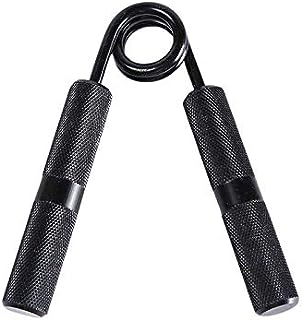

In [91]:
# This code will display an image given a URL
from PIL import Image
import requests

url = df["image"][2]

im = Image.open(requests.get(url, stream=True).raw)
display(im)

## Classes

In [139]:

class myProduct():
    def __init__(self,df,productname):
        self.df = df
        self.productname = productname
        self.productid = self.df[self.df['name'] == self.productname].index[0] # set the index as the product id 
        self.category = self.df.loc[self.productid, 'main_category'] # take the data from the dataframe
        self.subcategory = self.df.loc[self.productid, 'sub_category'] # take the data from the dataframe
        self.url_image = self.df.loc[self.productid, 'image'] # take the data from the dataframe
        self.url_product = self.df.loc[self.productid, 'link'] # take the data from the dataframe
        self.rating = float(self.df.loc[self.productid, 'ratings']) # take the data from the dataframe
        self.n_review = int(self.df.loc[self.productid, 'no_of_ratings']) # take the data from the dataframe
        self.r_price = self.clean_price(df.loc[self.productid, 'actual_price']) # take the data from the dataframe
        self.s_price = self.clean_price(df.loc[self.productid, 'discount_price']) # take the data from the dataframe
        df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

    def read_file(self, filename):
        self.df= None
        try:
            self.df = pd.read_csv(filename)
            print('{filename} read succesfully.')
        except:
            print ('Error.{filename} read unsuccesfully.')

    # clean the price data    
    def clean_price(self, price_str):
        price_str = str(price_str).replace(',', '').replace('₹', '').replace('$', '').strip()
        return float(price_str)
    
    #method to get the product id with a product name 

    def get_productid(self, productname):
        self.productid = self.df[self.df['name'] == productname].index[0]
        return self.productid 
    #method to get inquiry with product id 

    def get_category(self, productid):      
        self.category = self.df.loc[productid, 'main_category']
        return self.category
    
    def get_subcategory(self, productid):      
        self.subcategory =self.df.loc[productid, 'sub_category']
        return self.subcategory
    
    # method to get the image 
    def get_image(self,productid):
        url = self.df["image"][productid]
        try:
            im= Image.open(requests.get(url, stream=True).raw)
            display(im)
        except:
            return 'There is not image for this item.'

    def get_link(self, productid):
        self.url_product = self.df.loc[productid, 'link']
        return self.url_product

    def get_rating(self,productid):
        self.rating =self.df.loc[self.productid, 'ratings']
        return self.rating 
    
    def get_n_review(self, productid):
        self.n_review = self.df.loc[productid, 'no_of_ratings']
        return self.n_review
    
    def get_r_price(self,productid):
        self.r_price = self.df.loc[productid, 'actual_price']
        return self.r_price
    
    def get_s_price(self,productid):
        self.s_price = self.df.loc[productid,'discount_price']
        return self.s_price
    # provide the basic information of the item     
    def __str__(self):
        self.get_image(self.productid)
        return f'Product name:{self.productname}\nProduct Rating:{self.rating}\nProduct Price:{self.s_price}.'
    # get the discount price 
    def discount_price(self, discount_percentage, discount_amount):
        tmp_price = self.r_price

        if discount_percentage != 0:
            tmp_price = round(tmp_price * (1 - discount_percentage / 100), 2)

        if discount_amount != 0:
            tmp_price = round(tmp_price - discount_amount, 2)
        
        if tmp_price <= 0:
            tmp_price = 0 

        self.df.loc[self.productid, 'discount_price'] = tmp_price
        return f'Product name: {self.productname}, Regular Price: {self.r_price}, Discounted Price: {tmp_price}.'
    # add the rating in and increase the number of review 
    def add_rating(self, new_rating):
        self.rating = round((self.rating * self.n_review + new_rating) / (self.n_review + 1),2)
        self.n_review += 1

        self.df.loc[self.productid, 'ratings'] = self.rating
        self.df.loc[self.productid, 'no_of_ratings'] = self.n_review

        return f'Product name: {self.productname}, New Rating: {self.rating}, Number of Reviews: {self.n_review}.'

    

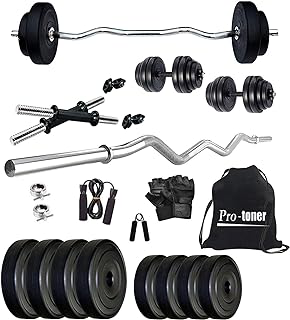

Product name:Protoner 16Kg PVC Combo Home Gym Package
Product Rating:3.6
Product Price:965.08.


'Product name: Protoner 16Kg PVC Combo Home Gym Package, New Rating: 3.6, Number of Reviews: 918.'

In [137]:
product = myProduct(df,'Protoner 16Kg PVC Combo Home Gym Package')
print(product)
product.add_rating(5)


In [133]:
class myInventory(myProduct):
    def __init__(self, df, productname=None):
        super().__init__(productname, df)
        self.productname = productname
        self.df = df
        stock_level = 0
        df['Stock level'] = stock_level
        self.stock_level = stock_level
        
    def read_file(self, filename):
        try:
            self.df = pd.read_csv(filename)
            print('{filename} read succesfully.')
        except:
            print ('Error.{filename} read unsuccesfully.')

    def add_product(self,new_product_info):
        for key,value in new_product_info.items():
            self.df.loc[len(self.df)] = [key, value]
        return' Product: {self.productname} has been added in the inventory'
    def remove_product(self, productname):
        productid = self.get_productid(productname)
        if product == self.df.loc[productid,' name']:
            df.drop(productid, inplace = True)
        else: 
            return f'We do not have this item in our inventory!'
    def print_all_product(self, category):
        category_products = self.df[self.df['main_category'] == category]
        if not category_products.empty:
            print(category_products['name'])
    
    def __add__(self,other_inventory):
        if self.productname == other_inventory.productname:
            combined_inv = myInventory(self.df[self.product])

            combined_inv.rating= (self.rating + other_inventory.rating)/2
            combined_inv.n_review = (self.n_review + other_inventory.n_review)

            combined_inv.df.loc[combined_inv.productid, 'ratings'] = combined_inv.rating
            combined_inv.df.loc[combined_inv.productid, 'no_of_ratings'] = combined_inv.n_review
            return combined_inv
        else: 
            return f'They are different product. Cannot add them together.'

    
    def top_x_rating(self,x):
        top_product = df.nlargest(x,'ratings')
        top_product_name = top_product['name'].tolist()
        top_ratings = top_product['ratings'].tolist()
        top_product_review = top_product['no_of_ratings']

        data2 = {'Product name': top_product_name, 'Product Ratings': top_ratings, 'Product Number of Review':top_product_review}
        df2 = pd.DataFrame(data2)
        return df2
    
    def change_stock(self, productname,stock_change):

        if productname == myInventory(self.productname):
            self.stock_level += stock_change

        return f'Product Name: {self.productname}, On Hand Quantity:{self.stock_level}.'
            
    def __len__(self):
        return sum(self.stock_level)


         



    

## Testing

This stuff should work...

You should also add more testing, that can be built into your final part of code. 

In [123]:
df = pd.read_csv("Strength Training.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917,₹965.08,"₹4,999"
1,Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprs...,https://www.amazon.in/Generic-Vinyl-Coated-Iro...,4.4,367,₹389,"₹6,450"
2,LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbF...,https://www.amazon.in/LALA-LIFE-Gripper-Streng...,4.5,381,₹489,"₹1,199"
3,Aurion Genuine Leather Pro Weight Lifting Belt...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/813g2hRYuo...,https://www.amazon.in/Genuine-Comfortable-Adju...,4.4,446,₹799,₹899
4,SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/61VcW8otph...,https://www.amazon.in/Dumbbells-Equipment-Fitn...,3.5,52,₹82.31,₹200


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1104 non-null   object
 1   main_category   1104 non-null   object
 2   sub_category    1104 non-null   object
 3   image           1104 non-null   object
 4   link            1104 non-null   object
 5   ratings         897 non-null    object
 6   no_of_ratings   897 non-null    object
 7   discount_price  1046 non-null   object
 8   actual_price    1088 non-null   object
dtypes: object(9)
memory usage: 77.8+ KB


In [134]:
# Create an inventory from the supplied file. 
inv = myInventory(df)
inv.read_file("Strength Training.csv")

TypeError: 'NoneType' object is not subscriptable

In [ ]:
#inv.printNext()

AttributeError: 'myInventory' object has no attribute 'printNext'

In [107]:
inv.top_x_rating(10)

TypeError: Column 'ratings' has dtype object, cannot use method 'nlargest' with this dtype

Test 2

In [ ]:
inv2 = myInventory()
#inv2.read_file("Car Electronics.csv")
#inv2.printNext()

In [ ]:
#new = inv + inv2
#new.printNext()